In [4]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1

In [5]:
i = 0

train_set=[]
train_output=[]
val_set=[]
val_output=[]
test_set=[]
test_output=[]

np.random.shuffle(X)
for x in X:
  R = np.random.uniform(0,1)
  if R>=0 and R<=0.7:
    train_set.append(X[i][:2])
    train_output.append(y[i])
  elif R>0.7 and R<=0.85:
    val_set.append(X[i][:2])
    val_output.append(y[i])
  else:
    test_set.append(X[i][:2])
    test_output.append(y[i])
  i+=1

In [6]:
print(len(test_set))
print(test_set)
print(test_output)
print(val_set)

32
[array([4.7, 3.2]), array([4.9, 3. ]), array([6.5, 3. ]), array([6.4, 2.9]), array([7.2, 3.2]), array([5.7, 3. ]), array([6.3, 3.4]), array([6.7, 3.1]), array([5.8, 2.8]), array([6.1, 2.8]), array([5.6, 2.7]), array([6.7, 3. ]), array([5.8, 2.7]), array([7.7, 3.8]), array([5.1, 2.5]), array([6.7, 3. ]), array([5.2, 4.1]), array([4.9, 2.5]), array([6.9, 3.2]), array([5.8, 2.6]), array([5., 2.]), array([4.4, 3. ]), array([4.6, 3.4]), array([6.5, 3.2]), array([7.7, 2.6]), array([5.3, 3.7]), array([4.8, 3. ]), array([6., 3.]), array([7.3, 2.9]), array([6.3, 2.8]), array([4.8, 3.4]), array([5. , 3.5])]
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[array([6.2, 3.4]), array([6.8, 3. ]), array([6.9, 3.1]), array([5.8, 4. ]), array([7.7, 3. ]), array([5.4, 3.4]), array([6.3, 2.9]), array([4.4, 2.9]), array([6. , 2.9]), array([4.8, 3.1]), array([7.7, 2.8]), array([4.8, 3. ]), array([5.4, 3. ]), array([5. , 3.4]), array([5.1, 3.7]), array([6.

In [19]:
import random
import math
theta = random.sample(range(-5000, 5000), 3)
lr = 0.0001

In [20]:
train_loss=[]
for i in range(1000):
  tj = 0
  for index in range (len(train_set)):
    x = train_set[index]
    x = np.concatenate(([1], x))
    z = np.dot(x,theta)
    # print(z)
    h = 1/(1+np.exp(-z))
    y = train_output[index]
    j = ((-y) * math.log1p(h)) - ((1-y) * math.log1p(1-h))
    tj += j
    dv = x * (h-y)
    theta = theta - (dv*lr)
    # print(theta)
  tj = tj/len(train_set)
  train_loss.append(tj)
  # print(train_loss)

<ipython-input-20-6c53b9ee2064>:9: RuntimeWarning: overflow encountered in exp
  h = 1/(1+np.exp(-z))


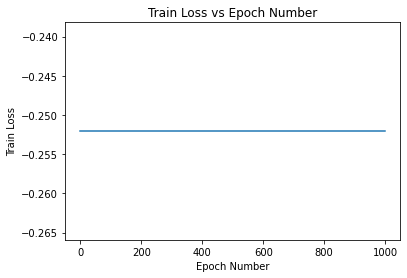

In [21]:
import matplotlib.pyplot as plt
 
x = np.arange(0, 1000).tolist()
y = train_loss
 
plt.plot(x, y)
plt.xlabel('Epoch Number')
plt.ylabel('Train Loss')
 
plt.title('Train Loss vs Epoch Number')
 
plt.show()

In [10]:
correct = 0
for i in range (len(val_set)):
  x = val_set[i]
  x = np.concatenate(([1], x))
  z = np.dot(x,theta)
  h = 1/(1+np.exp(-z))
  y = val_output[i]
  if h>=0.5:
    h = 1
  else:
    h = 0
  if h == y:
    correct += 1
val_acc = (correct/len(val_set)) * 100
print(str(val_acc)+"%")

63.1578947368421%


In [11]:
correct = 0
for i in range (len(test_set)):
  x = test_set[i]
  x = np.concatenate(([1], x))
  z = np.dot(x,theta)
  h = 1/(1+np.exp(-z))
  y = test_output[i]
  if h>=0.5:
    h = 1
  else:
    h = 0
  if h == y:
    correct += 1
val_acc = (correct/len(test_set)) * 100
print(str(val_acc)+"%")

78.125%
